In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

DATA_FILE_NAME = "ProcessedDataWithExtra.csv"
df = pd.read_csv(DATA_FILE_NAME)
df = df.sample(frac=1).reset_index(drop=True)


In [12]:
totalTrainingSet, totalTestSet = train_test_split(df,test_size=.2)
totalTrainingSet

,OutcomeType,isPurebred,AnimalType_Cat,AnimalType_Dog,SexuponOutcome_Female,SexuponOutcome_Male,SexuponOutcome_Unknown,AgeuponOutcome_Adolescent,AgeuponOutcome_Adult,AgeuponOutcome_Baby,...,Color_Silver Lynx Point,Color_Silver Tabby,Color_Tan,Color_Torbie,Color_Tortie,Color_Tortie Point,Color_Tricolor,Color_White,Color_Yellow,Color_Yellow Brindle
25413,1,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3163,1,0,0,1,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11115,0,0,0,1,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
164,2,1,0,1,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23714,2,0,1,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5865,0,0,1,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19135,0,0,0,1,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11655,2,0,1,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6167,0,0,0,1,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14023,0,0,0,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
fold = KFold(n_splits = 5)


# #classifier = MLPClassifier(hidden_layer_sizes=(32,16,10),max_iter=468)
# #classifier.fit(train.iloc[:,1:],train.iloc[:,0])
# #predictions = classifier.predict(validate.iloc[:,1:])
# n100 = []
# n1000 = []
# values = dict()
# estimators = [100,1000]
# criteria = ['gini','entropy']
# minSamplesLeaf = [5,15,50]

# #for i in range(0,5):
#      split = next(fold.split(totalTrainingSet), None)
#     train = totalTrainingSet.iloc[split[0]]
#     validate = totalTrainingSet.iloc[split[1]]
#     for est in estimators:
#         for crit in criteria:
#             for numSamp in minSamplesLeaf:
#                 classifier = RandomForestClassifier(oob_score=True,n_estimators=est,criterion=crit,min_samples_leaf=numSamp)
#                 classifier.fit(train.iloc[:,1:],train.iloc[:,0])
#                 predictions = classifier.predict(validate.iloc[:,1:])
#                 score = accuracy_score(validate.iloc[:,0],predictions) 
                
#                 key = str(est) + "/" + str(crit) + "/" + str(numSamp)
#                 if key in values.keys():
#                     values[key] = values[key] + score
#                 else:
#                     values[key] = [float(score)]
            
    
# values


In [13]:
#classifier = RandomForestClassifier(oob_score=True,n_estimators=10000,criterion='gini',min_samples_leaf=5)

classifier = MLPClassifier(hidden_layer_sizes=(16,12),max_iter=10000)
classifier.fit(totalTrainingSet.iloc[:,1:],totalTrainingSet.iloc[:,0])
predictions = classifier.predict(totalTestSet.iloc[:,1:])
score = accuracy_score(totalTestSet.iloc[:,0],predictions)

In [4]:
# from sklearn.model_selection import GridSearchCV
# param_grid = [
#         {
#             'hidden_layer_sizes': [
#              (16,10),(20,10),(32,10),
#              (16,8),(20,8),(32,8),
#              (16,12),(20,12),(32,12)
#              ]
#         }
#        ]
# clf = GridSearchCV(MLPClassifier(max_iter = 10000), param_grid, cv=3,
#                            scoring='accuracy')
# clf.fit(totalTestSet.iloc[:,1:],totalTestSet.iloc[:,0])


# clf.best_params_

{'hidden_layer_sizes': (16, 12)}

In [ ]:
import operator
for key in values.keys():
    values[key] = values[key] / 5.0
max(values.items(), key=operator.itemgetter(1))[0]

In [ ]:
values

In [ ]:
zipped = list(zip(totalTrainingSet.columns.values[1:],classifier.feature_importances_))
zipped

In [ ]:
sorted(zipped, key=lambda x: x[1])[-9:]

In [14]:
score

0.6096146651702207

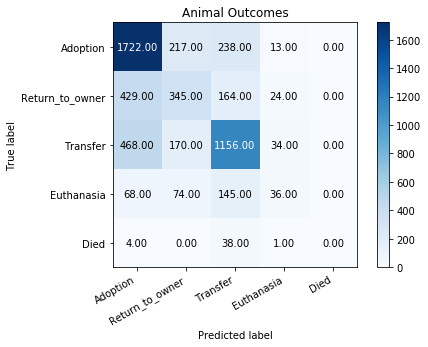

In [15]:
classes = ['Adoption','Return_to_owner','Transfer','Euthanasia','Died']
plt.rcParams["figure.figsize"] = (7,5)
normalize = True
cm =confusion_matrix(totalTestSet.iloc[:,0],predictions)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title= "Animal Outcomes",
       ylabel='True label',
       xlabel='Predicted label')
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.autofmt_xdate()
plt.savefig('MLP_WithDeadReturned.png')